<a href="https://colab.research.google.com/github/NeoNeuron/CCN2021_TUT/blob/main/STDP.ipynb" target="_blank"><img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>

---
# Spike Time Dependent Plasticity(STDP)

**Content Creator:** Yuxiu Shao

## Tutorial Objectives

In this tutorial, we will focus on building a model of a synapse in which its synaptic strength changes as a function of the relative timing (i.e., time difference) between the spikes of the presynaptic and postsynaptic neurons, respectively. This change in the synaptic weight is known as **spike-timing dependent plasticity (STDP)**.

Our goals for this tutorial are to:

- build a model of synapse that show STDP

- study how correlations in input spike trains influence the distribution of synaptic weights

Towards these goals, we will model the presynaptic input as Poisson type spike trains. The postsynaptic neuron will be modeled as an LIF neuron (Done!).

Throughout this tutorial, we assume that a single postsynaptic neuron is driven by $N$ presynaptic neurons. That is, there are $N$ synapses, and we will study how their weights depend on the statistics or the input spike trains and their timing with respect to the spikes of the postsynaptic neuron.


In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# @title Helper functions

def default_pars_STDP(**kwargs):
  pars = {}

  # typical neuron parameters
  pars['V_th'] = -55.     # spike threshold [mV]
  pars['V_reset'] = -75.  # reset potential [mV]
  pars['tau_m'] = 10.     # membrane time constant [ms]
  pars['V_init'] = -65.   # initial potential [mV]
  pars['V_L'] = -75.      # leak reversal potential [mV]
  pars['tref'] = 2.       # refractory time (ms)

  # STDP parameters
  pars['A_plus'] = 0.008                   # magnitude of LTP
  pars['A_minus'] = pars['A_plus'] * 1.10  # magnitude of LTD
  pars['tau_stdp'] = 20.                   # STDP time constant [ms]

  # simulation parameters
  pars['T'] = 400.  # Total duration of simulation [ms]
  pars['dt'] = .1   # Simulation time step [ms]

  # external parameters if any
  for k in kwargs:
    pars[k] = kwargs[k]

  pars['range_t'] = np.arange(0, pars['T'], pars['dt'])  # Vector of discretized time points [ms]

  return pars


def Poisson_generator(pars, rate, n, myseed=False):
  """Generates poisson trains

  Args:
    pars            : parameter dictionary
    rate            : noise amplitute [Hz]
    n               : number of Poisson trains
    myseed          : random seed. int or boolean

  Returns:
    pre_spike_train : spike train matrix, ith row represents whether
                      there is a spike in ith spike train over time
                      (1 if spike, 0 otherwise)
  """

  # Retrieve simulation parameters
  dt, range_t = pars['dt'], pars['range_t']
  Lt = range_t.size

  # set random seed
  if myseed:
    np.random.seed(seed=myseed)
  else:
    np.random.seed()

  # generate uniformly distributed random variables
  u_rand = np.random.rand(n, Lt)

  # generate Poisson train
  poisson_train = 1. * (u_rand < rate * (dt / 1000.))

  return poisson_train

## Model of STDP
### Bi, G.Q. and Poo, M.M., 1998. Synaptic modifications in cultured hippocampal neurons: dependence on spike timing, synaptic strength, and postsynaptic cell type. Journal of neuroscience, 18(24), pp.10464-10472. https://www.jneurosci.org/content/18/24/10464.abstract
The phenomenology of STDP is generally described as a biphasic exponentially decaying function. That is, the instantaneous change in weights is given by:

\begin{eqnarray}
& \Delta W &=& A_+ e^{ (t_{pre}-t_{post})/\tau_+}  & \text{if} \hspace{5mm}  t_{post} > t_{pre}& \\
& \Delta W &=& -A_- e^{- (t_{pre}-t_{post})/\tau_-}   &\text{if} \hspace{5mm} t_{post} < t_{pre}& \\
\end{eqnarray}

where $\Delta W$ denotes the change in the synaptic weight, $A_+$ and $A_-$ determine the maxmimum amount of synaptic modification (which occurs when the timing difference between presynaptic and postsynaptic spikes is close to zero), $\tau_+$ and $\tau_-$ determine the ranges of pre-to-postsynaptic interspike intervals over which synaptic strengthening or weakening occurs. Thus, $\Delta W > 0 $ means that postsynaptic neuron spikes after the presynaptic neuron.

This model captures the phenomena that repeated occurrences of presynaptic spikes within a few milliseconds **before** postsynaptic action potentials lead to long-term potentiation (LTP) of the synapse, whereas repeated occurrences of presynaptic spikes **after** the postsynaptic ones lead to long-term depression (LTD) of the same synapse.

The latency between presynaptic and postsynaptic spike ($\Delta t$) is defined as:

\begin{eqnarray}
\Delta t = t_{\rm pre} - t_{\rm post}
\end{eqnarray}

where $t_{\rm pre}$ and $t_{\rm post}$ are the timings of the presynaptic and postsynaptic spikes, respectively.


In [3]:
def Delta_W(pars, time_diff, A_plus, A_minus, tau_stdp):
  """
  Plot STDP biphasic exponential decaying function
  Args:
    pars       : parameter dictionary
    time_diff  : time difference between pre and post spike times
    A_plus     : (float) maxmimum amount of synaptic modification
                 which occurs when the timing difference between pre- and
                 post-synaptic spikes is positive
    A_plus     : (float) maxmimum amount of synaptic modification
                 which occurs when the timing difference between pre- and
                 post-synaptic spikes is negative
    tau_stdp   : the ranges of pre-to-postsynaptic interspike intervals
                 over which synaptic strengthening or weakening occurs
  Returns:
    dW         : instantaneous change in weights
  """

  # Fill in the code marked as (...)

  # STDP change
  dW = np.zeros(len(time_diff))
  # Calculate dW for LTP (time difference < 0)
  idxLTP = ...
  dW[idxLTP] = ...
  # Calculate dW for LTD (time difference > 0)
  idxLTD = ...
  dW[idxLTD] = ...

  return dW

pars = default_pars_STDP()
# Get parameters
A_plus, A_minus, tau_stdp = pars['A_plus'], pars['A_minus'], pars['tau_stdp']
# pre_spike time - post_spike time
time_diff = np.linspace(-5 * tau_stdp, 5 * tau_stdp, 50)

# Uncomment to test your function
# dW = Delta_W(pars, time_diff, A_plus, A_minus, tau_stdp)
# fig,ax = plt.subplots(figsize=(4,4))
# ax.scatter(time_diff, dW)
# ax.axvline(c='grey', lw=1)
# ax.axhline(c='grey', lw=1)

### Example

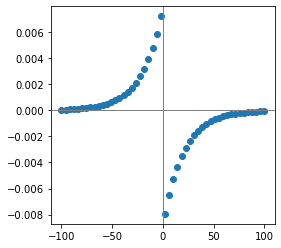

In [5]:
#@title Click to reveal answer example
def Delta_W(pars, time_diff, A_plus, A_minus, tau_stdp):
  """
  Plot STDP biphasic exponential decaying function
  Args:
    pars       : parameter dictionary
    time_diff  : time difference between pre and post spike times
    A_plus     : (float) maxmimum amount of synaptic modification
                 which occurs when the timing difference between pre- and
                 post-synaptic spikes is positive
    A_plus     : (float) maxmimum amount of synaptic modification
                 which occurs when the timing difference between pre- and
                 post-synaptic spikes is negative
    tau_stdp   : the ranges of pre-to-postsynaptic interspike intervals
                 over which synaptic strengthening or weakening occurs
  Returns:
    dW         : instantaneous change in weights
  """

  # STDP change
  dW = np.zeros(len(time_diff))
  # Calculate dW for LTP
  idxLTP = np.where(time_diff<=0)
  dW[idxLTP] = A_plus * np.exp(time_diff[idxLTP] / tau_stdp)
  # Calculate dW for LTD
  idxLTD = np.where(time_diff>0)
  dW[idxLTD] = -A_minus * np.exp(-time_diff[idxLTD] / tau_stdp)

  return dW


pars = default_pars_STDP()
# Get parameters
A_plus, A_minus, tau_stdp = pars['A_plus'], pars['A_minus'], pars['tau_stdp']
# pre_spike time - post_spike time
time_diff = np.linspace(-5 * tau_stdp, 5 * tau_stdp, 50)

# Uncomment to test your function
dW = Delta_W(pars, time_diff, A_plus, A_minus, tau_stdp)
fig,ax = plt.subplots(figsize=(4,4))
ax.scatter(time_diff, dW)
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)